<a href="https://colab.research.google.com/github/koleshjr/collab_projects/blob/main/alvinseda_updatedEDA_Customize_Merchants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ALVIN'S EDA

In [355]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [356]:
# !pip install catboost

### Import all the necessary Libraries

In [357]:
#Import some libraries
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import plotly.express as px
from pylab import rcParams
import seaborn as sb
sb.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
# from imblearn.over_sampling import SMOTE

pd.options.display.max_rows = 2200

In [358]:
path = "/content/drive/MyDrive/Final_alvin/"

### Load the datasets and find statistical information about them

In [359]:
#import data
train = pd.read_csv(path+'Train.csv')
test=  pd.read_csv(path+'Test.csv')
submission = pd.read_csv(path+'SampleSubmission.csv')
vardef = pd.read_csv(path+"VariableDefinitions.csv")
extra = pd.read_csv(path+"extra_data.csv")

In [360]:
train.shape,test.shape,extra.shape

((373, 12), (558, 11), (10000, 12))

In [361]:
train.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa
1,2021-10-25 16:18:38.586837+00,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00,False,25.0,Female,4,90000,ID_U9WZMGJZ,ID_04xkfb07
2,2022-05-20 14:17:30.917297+00,SAFARICOM OFFERS TUNUKIWA,Data & WiFi,20,2022-05-27 12:46:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_051urwuw
3,2022-04-12 15:59:14.139347+00,ZILLIONS CREDIT LIMITED,Loan Repayment,3800,2022-02-07 12:16:00+00,False,NaN,Male,5,252000,ID_3JA0MAFB,ID_0e1om7rz
4,2022-05-04 10:24:26.709045+00,MICHAEL MUSEMBI,Bills & Fees,60,2022-05-04 15:28:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0kfcoawb


In [362]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MERCHANT_CATEGORIZED_AT                373 non-null    object 
 1   MERCHANT_NAME                          373 non-null    object 
 2   MERCHANT_CATEGORIZED_AS                373 non-null    object 
 3   PURCHASE_VALUE                         373 non-null    int64  
 4   PURCHASED_AT                           373 non-null    object 
 5   IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY  373 non-null    bool   
 6   USER_AGE                               61 non-null     float64
 7   USER_GENDER                            367 non-null    object 
 8   USER_HOUSEHOLD                         373 non-null    int64  
 9   USER_INCOME                            373 non-null    int64  
 10  USER_ID                                373 non-null    object 
 11  Transa

In [363]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PURCHASE_VALUE,373.0,4506.522788,15722.261797,10.0,150.0,690.0,2000.0,150000.0
USER_AGE,61.0,25.803279,1.423841,25.0,25.0,25.0,27.0,32.0
USER_HOUSEHOLD,373.0,2.831099,1.600033,1.0,1.0,3.0,4.0,7.0
USER_INCOME,373.0,146235.924933,166521.780346,8000.0,23000.0,90000.0,200000.0,1000000.0


### Missing values for train, test and extra

In [364]:
#check for missing values
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_train = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': percent_missing})
missing_value_train

,column_name,percent_missing
MERCHANT_CATEGORIZED_AT,MERCHANT_CATEGORIZED_AT,0.000000
MERCHANT_NAME,MERCHANT_NAME,0.000000
MERCHANT_CATEGORIZED_AS,MERCHANT_CATEGORIZED_AS,0.000000
PURCHASE_VALUE,PURCHASE_VALUE,0.000000
PURCHASED_AT,PURCHASED_AT,0.000000
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,0.000000
USER_AGE,USER_AGE,83.646113
USER_GENDER,USER_GENDER,1.608579
USER_HOUSEHOLD,USER_HOUSEHOLD,0.000000
USER_INCOME,USER_INCOME,0.000000


In [365]:
#check for missing values
percent_missing = test.isnull().sum() * 100 / len(test)
missing_value_test = pd.DataFrame({'column_name': test.columns,
                                 'percent_missing': percent_missing})
missing_value_test

,column_name,percent_missing
MERCHANT_CATEGORIZED_AT,MERCHANT_CATEGORIZED_AT,0.000000
MERCHANT_NAME,MERCHANT_NAME,0.000000
PURCHASE_VALUE,PURCHASE_VALUE,0.000000
PURCHASED_AT,PURCHASED_AT,0.000000
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,0.000000
USER_AGE,USER_AGE,84.767025
USER_GENDER,USER_GENDER,0.896057
USER_HOUSEHOLD,USER_HOUSEHOLD,0.000000
USER_INCOME,USER_INCOME,0.000000
USER_ID,USER_ID,0.000000


In [366]:
#check for missing values
percent_missing = extra.isnull().sum() * 100 / len(extra)
missing_value_extra = pd.DataFrame({'column_name': extra.columns,
                                 'percent_missing': percent_missing})
missing_value_extra

,column_name,percent_missing
MERCHANT_CATEGORIZED_AT,MERCHANT_CATEGORIZED_AT,100.00
MERCHANT_NAME,MERCHANT_NAME,0.00
MERCHANT_CATEGORIZED_AS,MERCHANT_CATEGORIZED_AS,100.00
PURCHASE_VALUE,PURCHASE_VALUE,0.00
PURCHASED_AT,PURCHASED_AT,0.00
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,0.00
USER_AGE,USER_AGE,88.42
USER_GENDER,USER_GENDER,0.34
USER_HOUSEHOLD,USER_HOUSEHOLD,0.00
USER_INCOME,USER_INCOME,0.00


In [367]:
extra = extra.drop(columns = ['MERCHANT_CATEGORIZED_AS','MERCHANT_CATEGORIZED_AT'])

In [368]:
cat_columns = [col for col in train.select_dtypes('object').columns]

num_columns = [col for col in train.select_dtypes(['int', 'float']).columns]

### Lets fill the categorical ones with male 
* I chose this because the missing gender is only for one person. So he/she may either be a male or female so used male

In [369]:
train['USER_GENDER'].value_counts()

Male      197
Female    170
Name: USER_GENDER, dtype: int64

In [370]:
for col in train.columns:

  if col in ['USER_GENDER']:
    train[col] = train[col].fillna('Male')
    

# Confirm that there aren't any missing values
train[train.columns.difference(['cost_category'])].isna().sum()

IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      0
MERCHANT_CATEGORIZED_AS                    0
MERCHANT_CATEGORIZED_AT                    0
MERCHANT_NAME                              0
PURCHASED_AT                               0
PURCHASE_VALUE                             0
Transaction_ID                             0
USER_AGE                                 312
USER_GENDER                                0
USER_HOUSEHOLD                             0
USER_ID                                    0
USER_INCOME                                0
dtype: int64

In [371]:
for col in test.columns:

  if col in ['USER_GENDER']:
    test[col] = test[col].fillna('Male')
    

# Confirm that there aren't any missing values
test[test.columns.difference(['cost_category'])].isna().sum()

IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      0
MERCHANT_CATEGORIZED_AT                    0
MERCHANT_NAME                              0
PURCHASED_AT                               0
PURCHASE_VALUE                             0
Transaction_ID                             0
USER_AGE                                 473
USER_GENDER                                0
USER_HOUSEHOLD                             0
USER_ID                                    0
USER_INCOME                                0
dtype: int64

In [372]:
for col in extra.columns:

  if col in ['USER_GENDER']:
    extra[col] = extra[col].fillna('Male')
    

# Confirm that there aren't any missing values
extra[extra.columns.difference(['cost_category'])].isna().sum()

IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY       0
MERCHANT_NAME                               0
PURCHASED_AT                                0
PURCHASE_VALUE                              0
Transaction_ID                              0
USER_AGE                                 8842
USER_GENDER                                 0
USER_HOUSEHOLD                              0
USER_ID                                     0
USER_INCOME                                 0
dtype: int64

### For a baseline lets drop the age column (84% is alot of missing values)

In [373]:
train = train.drop(columns = 'USER_AGE')
test = test.drop(columns = 'USER_AGE')
extra = extra.drop(columns = 'USER_AGE')
train.shape,test.shape,extra.shape

((373, 11), (558, 10), (10000, 9))

## Categorical Data

In [374]:
# check unique values in dataset
train.apply(lambda x: len(x.unique()))

MERCHANT_CATEGORIZED_AT                   58
MERCHANT_NAME                            218
MERCHANT_CATEGORIZED_AS                   13
PURCHASE_VALUE                           150
PURCHASED_AT                             365
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      2
USER_GENDER                                2
USER_HOUSEHOLD                             7
USER_INCOME                               15
USER_ID                                   25
Transaction_ID                           373
dtype: int64

In [375]:
# check unique values in dataset
test.apply(lambda x: len(x.unique()))

MERCHANT_CATEGORIZED_AT                   57
MERCHANT_NAME                            314
PURCHASE_VALUE                           213
PURCHASED_AT                             535
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      2
USER_GENDER                                2
USER_HOUSEHOLD                             9
USER_INCOME                               17
USER_ID                                   30
Transaction_ID                           558
dtype: int64

### Levels In the Categorical Data + Date with a lot of classes
### Categorized at 


In [376]:
train['MERCHANT_CATEGORIZED_AT'].value_counts()

2022-04-12 15:59:14.139347+00    42
2022-03-16 13:08:19.703288+00    35
2022-03-16 13:05:51.851102+00    35
2022-04-12 15:57:05.758311+00    30
2022-05-31 13:27:24.704992+00    20
2021-09-01 02:20:12.680427+00    18
2021-09-01 02:19:31.317098+00    15
2021-10-05 12:29:13.14963+00     13
2022-06-01 10:23:56.42678+00     13
2021-10-25 16:27:55.188211+00    12
2022-06-01 10:25:16.7131+00      11
2022-03-10 18:25:42.112294+00     8
2022-05-31 13:27:55.17584+00      8
2022-05-12 15:46:32.634262+00     7
2021-10-05 12:45:58.000193+00     6
2021-12-01 08:30:46.660752+00     6
2022-03-10 18:21:31.781487+00     6
2022-05-31 13:21:55.629867+00     6
2021-10-25 16:18:38.586837+00     5
2022-04-12 15:57:15.179609+00     5
2022-04-12 15:59:29.101096+00     5
2021-11-30 10:51:36.702996+00     4
2021-12-01 08:33:13.82067+00      4
2022-05-12 15:40:05.951342+00     3
2022-02-23 13:37:55.038678+00     3
2021-08-06 11:28:03.723042+00     3
2021-08-06 11:28:03.855344+00     3
2022-05-13 06:55:53.403538+0

In [377]:
test['MERCHANT_CATEGORIZED_AT'].value_counts()

2022-04-12 15:57:05.758311+00    67
2022-04-12 15:59:14.139347+00    58
2022-03-16 13:05:51.851102+00    49
2022-03-16 13:08:19.703288+00    48
2022-05-31 13:27:24.704992+00    29
2021-09-01 02:20:12.680427+00    23
2021-09-01 02:19:31.317098+00    20
2022-06-01 10:23:56.42678+00     18
2021-10-05 12:29:13.14963+00     17
2021-10-05 12:45:58.000193+00    17
2022-06-01 10:25:16.7131+00      16
2022-05-12 15:40:05.951342+00    13
2022-04-12 15:59:29.101096+00    13
2021-10-25 16:27:55.188211+00    11
2022-03-10 18:21:31.781487+00    11
2021-10-25 16:18:38.586837+00    10
2022-05-31 13:21:55.629867+00     9
2021-12-01 08:30:46.660752+00     9
2022-05-12 15:46:32.634262+00     7
2022-03-10 18:25:42.112294+00     7
2022-05-04 18:39:01.19219+00      7
2022-04-08 10:56:46.107675+00     7
2022-02-23 13:31:09.552091+00     7
2022-04-12 15:57:15.179609+00     6
2022-02-23 13:37:55.038678+00     6
2022-05-31 13:27:55.17584+00      6
2021-12-01 08:33:13.82067+00      6
2022-05-04 18:39:01.881199+0

#### get the year, month, date, day feature from this feature, see if it helps

### User_Income

In [378]:
train['USER_INCOME'].value_counts()

10000      70
85000      63
252000     49
200000     49
90000      38
250000     19
150000     17
23000      17
8000       14
750000     13
30000       7
60000       6
100000      4
350000      4
1000000     3
Name: USER_INCOME, dtype: int64

In [379]:
test['USER_INCOME'].value_counts()

10000      118
85000      101
252000      73
200000      63
90000       52
23000       34
150000      25
750000      22
250000      20
8000        16
30000       10
350000       9
100000       9
60000        3
1000000      1
80000        1
36000        1
Name: USER_INCOME, dtype: int64

#### Since there are two more new user_income levels in test and more in extra data decided to cluster them
* clustering was based on near price ranges as seen below

In [380]:
def income_clusters(x):
    one=[10000]
    two=[85000, 80000]
    three=[252000]
    four =[200000]
    five=[90000]
    six =[250000]
    seven=[150000]
    eight=[23000,21500 ,20000]
    nine=[8000,5000]
    ten=[750000]
    eleven=[30000,36000,35000]
    twelve =[60000]
    thirteen=[100000]
    fourteen = [350000]
    fifteen = [1000000]
    
    if x in one:
        return 10000
    elif x in two:
        return 85000
    elif x in three:
        return 252000
    elif x in four:
        return 200000   
    elif x in five:
        return 90000
    if x in six:
        return 250000
    elif x in seven:
        return 150000
    elif x in eight:
        return 23000
    elif x in nine:
        return 8000 
    elif x in ten:
        return 750000
    if x in eleven:
        return 30000
    elif x in twelve:
        return 60000
    elif x in thirteen:
        return 100000
    elif x in fourteen:
        return 350000 
    elif x in fifteen:
        return 1000000 
test['USER_INCOME'] = test['USER_INCOME'].apply(income_clusters)
train['USER_INCOME'] = train['USER_INCOME'].apply(income_clusters)
extra['USER_INCOME'] = extra['USER_INCOME'].apply(income_clusters)
print(train['USER_INCOME'].nunique())
print(test['USER_INCOME'].nunique())
print(extra['USER_INCOME'].nunique())    

15
15
15


### User_ID

In [381]:
train['USER_ID'].value_counts()

ID_1I8XYBWK    56
ID_3JA0MAFB    49
ID_ECX9BS4A    44
ID_ZX4DCF4K    43
ID_U9WZMGJZ    38
ID_Y0386AT9    17
ID_L8QMYB09    14
ID_O8P8YS18    14
ID_OZANC6XT    13
ID_D8FOVVBB    13
ID_40L9OTIM     9
ID_GR569FUO     7
ID_J8O7LHZ2     7
ID_WO19RXAS     7
ID_R4T8Q46J     6
ID_KARF7R4R     6
ID_OYT3IDV6     5
ID_5Y35KI6Q     5
ID_GAQ3PX9G     4
ID_3XJU0KQ9     4
ID_UJ0YSYEV     4
ID_180RJKP4     3
ID_CVK8ERW1     2
ID_BMPPYJ2U     2
ID_A7LQCJFS     1
Name: USER_ID, dtype: int64

In [382]:
test['USER_ID'].value_counts()

ID_1I8XYBWK    92
ID_3JA0MAFB    73
ID_ZX4DCF4K    65
ID_ECX9BS4A    54
ID_U9WZMGJZ    52
ID_Y0386AT9    34
ID_D8FOVVBB    22
ID_GR569FUO    20
ID_OYT3IDV6    19
ID_O8P8YS18    17
ID_L8QMYB09    16
ID_OZANC6XT    12
ID_40L9OTIM     9
ID_3XJU0KQ9     9
ID_WO19RXAS     9
ID_J8O7LHZ2     9
ID_5Y35KI6Q     8
ID_KARF7R4R     8
ID_CVK8ERW1     6
ID_GAQ3PX9G     6
ID_R4T8Q46J     5
ID_1AMEATOU     3
ID_UJ0YSYEV     2
ID_A7LQCJFS     2
ID_180RJKP4     1
ID_QIBWKFP0     1
ID_BMPPYJ2U     1
ID_9OCPCLOX     1
ID_KVE1YQI4     1
ID_90M21S6P     1
Name: USER_ID, dtype: int64

#### 5 new customers, meaning that we have to consider this in the stratification scheme 
* well i never succeeded in this decided to go with StratifiedKFold instead

### User_ Household

In [383]:
train['USER_HOUSEHOLD'].value_counts()

1    126
3    100
5     76
4     38
2     26
7      4
6      3
Name: USER_HOUSEHOLD, dtype: int64

In [384]:
test['USER_HOUSEHOLD'].value_counts()

1    183
3    140
5    113
2     55
4     53
7      9
9      3
6      1
8      1
Name: USER_HOUSEHOLD, dtype: int64

#### More  user_household data in test and extra so cluster them in train

In [385]:
def house_clusters(x):
    one=[1]
    two=[2]
    three=[3]
    four =[4]
    five=[5]
    six =[6]
    seven=[7,8,9]

    

    if x == 1:
        return 1
    if x == 2:
        return 2
    if x == 3:
        return 3
    if x == 4:
        return 4
    if x == 5:
        return 5
    if x == 6:
        return 6
    if x >= 7:
        return 7

   
test['USER_HOUSEHOLD'] = test['USER_HOUSEHOLD'].apply(house_clusters)
extra['USER_HOUSEHOLD'] = extra['USER_HOUSEHOLD'].apply(house_clusters)
print(train['USER_HOUSEHOLD'].nunique())
print(test['USER_HOUSEHOLD'].nunique())
print(extra['USER_HOUSEHOLD'].nunique())
    

7
7
7


### Merchant_Name

In [386]:
train['MERCHANT_NAME'].value_counts()

SAFARICOM OFFERS  TUNUKIWA                          14
M-SHWARI ACCOUNT                                    12
PETER KENDA                                         10
SAFARICOM LIMITED                                   10
EQUITY PAYBILL ACCOUNT                               8
KPLC PREPAID                                         8
CARREFOUR SRT                                        7
LEAH NGOGA                                           7
SAFARICOM HOME                                       6
FATUMA OSORE                                         6
SAFARICOM POST PAID                                  5
ELIZABETH NYAMBURA                                   5
JACKSON ANDIVA                                       4
RAPHAEL MWANGI                                       4
NHIF                                                 4
KAPS PARKING                                         4
JERUSA OTIENO                                        4
CEDRIC OCHOLA                                        4
TELKOM KEN

In [387]:
test['MERCHANT_NAME'].value_counts()

FATUMA OSORE                                         17
PETER KENDA                                          14
SAFARICOM OFFERS  TUNUKIWA                           13
KPLC PREPAID                                         12
KAPS PARKING                                         11
EQUITY PAYBILL ACCOUNT                               11
M-SHWARI ACCOUNT                                     10
SAFARICOM HOME                                        8
SAFARICOM LIMITED                                     8
LEAH NGOGA                                            8
JACKSON ANDIVA                                        7
QUICK MART KIAMBU                                     7
RAPHAEL MWANGI                                        7
TELKOM KENYA LIMITED                                  5
TEOFILO LIGAWA                                        5
KCB PAYBILL AC                                        5
SAFARICOM POST PAID                                   5
CEDRIC OCHOLA                                   

#### Even though merchant name, using domain knowledge might be useful because there is no way safaricom sells groceries but there are so many unknown vendors that may add noise to this plus there are new merchants in the test so maybe after the baseline we can work this out .
* This is our golf feature, if we can work a way around this feature in a good way then we can really bag the first prize


### Binary Columns 

In [388]:
train['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'].value_counts()

False    203
True     170
Name: IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY, dtype: int64

In [389]:
test['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'].value_counts()

False    299
True     259
Name: IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY, dtype: int64

In [390]:
train['USER_GENDER'].value_counts()

Male      203
Female    170
Name: USER_GENDER, dtype: int64

In [391]:
test['USER_GENDER'].value_counts()

Male      312
Female    246
Name: USER_GENDER, dtype: int64

#### So the binary columns are almost equally balanced so fine

## NUMERICAL COLUMNS

### Purchase Value before and after log transformation

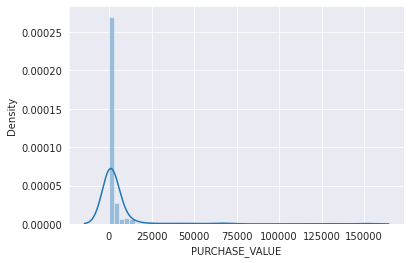

In [392]:
sb.distplot(train['PURCHASE_VALUE'])

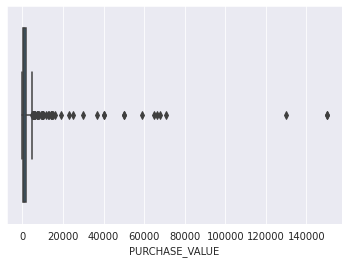

In [393]:
sb.boxplot(train['PURCHASE_VALUE'])

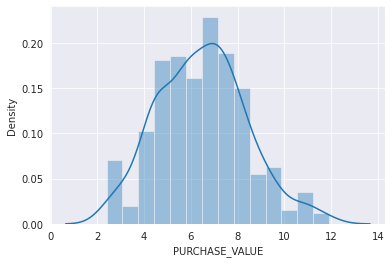

In [394]:
sb.distplot(np.log1p(train['PURCHASE_VALUE']))

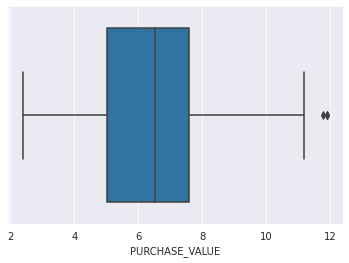

In [395]:
sb.boxplot(np.log1p(train['PURCHASE_VALUE']))

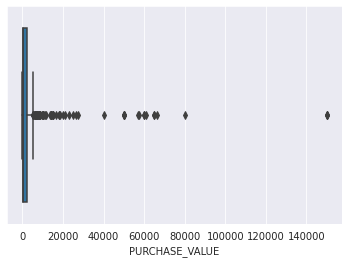

In [396]:
sb.boxplot(test['PURCHASE_VALUE'])

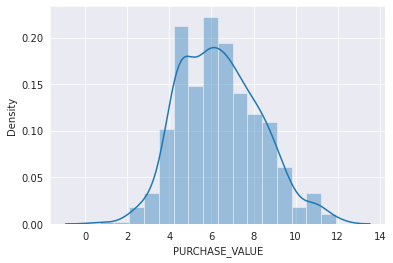

In [397]:
sb.distplot(np.log1p(test['PURCHASE_VALUE']))

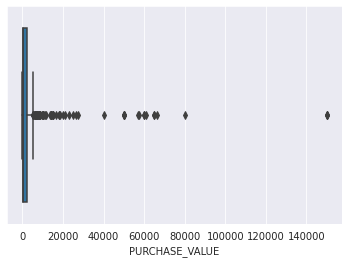

In [398]:
sb.boxplot(test['PURCHASE_VALUE'])

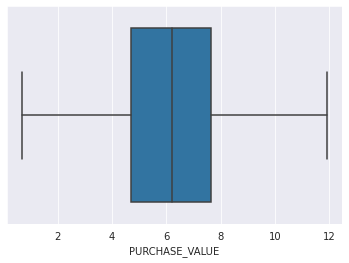

In [399]:
sb.boxplot(np.log1p(test['PURCHASE_VALUE']))

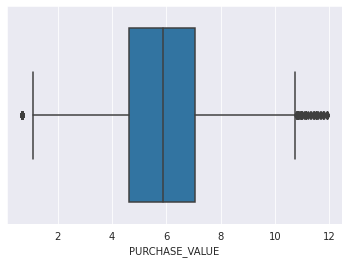

In [400]:
sb.boxplot(np.log1p(extra['PURCHASE_VALUE']))

#### Notice how when we log transform purchase value everything behaves as a gaussian transformation so this transformation is a must have
* Turns out it made the CV score worse why? maybe we need to have those extremes for the categories that are expensive in regards to PURCHASE VALUE

In [401]:
# train['PURCHASE_VALUE'] = np.log1p(train['PURCHASE_VALUE'])
# test['PURCHASE_VALUE'] = np.log1p(test['PURCHASE_VALUE'])
# extra['PURCHASE_VALUE'] = np.log1p(extra['PURCHASE_VALUE'])

### DATE COLUMNS
### Purchased_At 

In [402]:
train.columns

Index(['MERCHANT_CATEGORIZED_AT', 'MERCHANT_NAME', 'MERCHANT_CATEGORIZED_AS',
       'PURCHASE_VALUE', 'PURCHASED_AT',
       'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY', 'USER_GENDER',
       'USER_HOUSEHOLD', 'USER_INCOME', 'USER_ID', 'Transaction_ID'],
      dtype='object')

2021-11-18 11:02:00+00    2
2021-08-24 14:53:00+00    2
2021-08-04 15:03:00+00    2
2021-01-15 15:40:00+00    2
2021-10-22 15:49:00+00    2
2021-10-11 17:12:00+00    2
2019-06-20 08:41:00+00    2
2019-03-11 05:38:00+00    2
2022-04-07 12:10:00+00    1
2022-01-21 11:29:00+00    1
2022-02-26 15:38:00+00    1
2022-05-14 19:00:00+00    1
2022-04-09 07:11:00+00    1
2021-12-02 18:37:00+00    1
2018-12-05 09:36:00+00    1
2022-03-07 20:16:00+00    1
2021-12-22 12:13:00+00    1
2021-11-19 11:24:00+00    1
2022-02-09 04:58:00+00    1
2021-11-30 08:24:00+00    1
2021-09-11 12:26:00+00    1
2022-05-25 10:00:00+00    1
2019-03-25 09:46:00+00    1
2022-05-12 05:50:00+00    1
2021-10-02 14:16:00+00    1
2020-03-24 10:10:00+00    1
2022-04-05 09:19:00+00    1
2021-11-08 10:31:00+00    1
2021-09-23 14:40:00+00    1
2021-09-27 11:18:00+00    1
2021-10-18 06:42:00+00    1
2021-11-01 08:56:00+00    1
2022-03-27 16:30:00+00    1
2021-10-23 17:46:00+00    1
2022-06-01 08:40:00+00    1
2022-06-02 19:18:00+

Text(0.5, 0, 'PURCHASED_AT')

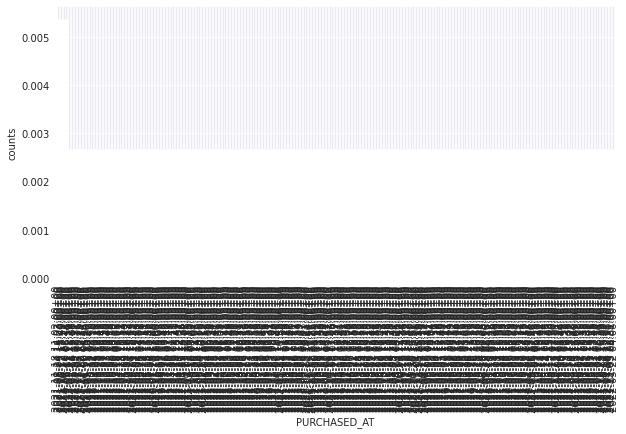

In [403]:
print(train['PURCHASED_AT'].value_counts())
plt.figure(figsize=(10,5))
train['PURCHASED_AT'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('PURCHASED_AT')

#### On this, only few dates have more than one feature

* is it really important? feed it into the model and let the model do the rest
* More Features can be obtained from this e.g diff and cyclic features 
* No good feature came out of this really except one which was the diff of both which we will see later


### Meerchannt Categorized at we have looked at it above

### Single Level Columns(One in extra drop it)

In [404]:
extra = extra.drop(columns = ['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'])
train.shape,test.shape,extra.shape

((373, 11), (558, 10), (10000, 8))

## Target Column

Bills & Fees        78
Groceries           50
Data & WiFi         43
Miscellaneous       43
Family & Friends    41
Going out           41
Transport & Fuel    29
Shopping            21
Emergency fund      12
Health               6
Loan Repayment       5
Rent / Mortgage      2
Education            2
Name: MERCHANT_CATEGORIZED_AS, dtype: int64


Text(0.5, 0, 'MERCHANT_CATEGORIZED_AS')

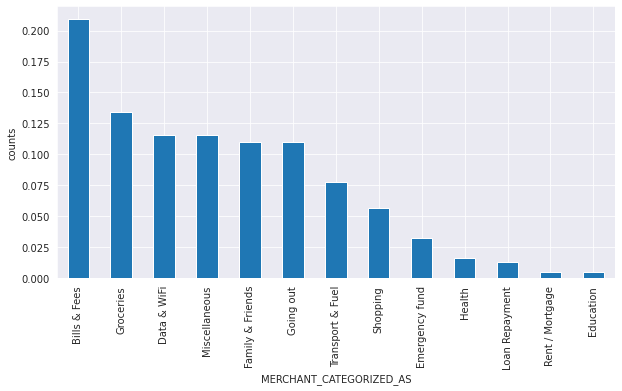

In [405]:
print(train['MERCHANT_CATEGORIZED_AS'].value_counts())
plt.figure(figsize=(10,5))
train['MERCHANT_CATEGORIZED_AS'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('MERCHANT_CATEGORIZED_AS')

#### Health - 6, Loan Repayment  -5. Rent / Mortgage - 2,Education -2
#### the above classes are highly imbalanced 

## Convcat both datasets for more FE

In [406]:
#CONCATENATING BOTH THE TEST AND TRAIN FOR EASY DATA MANIPULATON
ntrain = train.shape[0]
ntest = test.shape[0]
data = pd.concat((train, test)).reset_index(drop=True)

### Binning

In [407]:
def price_range(x):
    if x > 8e4:
        return 0
    elif x > 4e4:
        return 1
    elif x > 1e4:
        return 2
    return 3
data['price_range'] = data.PURCHASE_VALUE.apply(price_range)
extra['price_range'] = extra.PURCHASE_VALUE.apply(price_range)

def income_range(x):
    x /= 1e6
    # print(x)
    if x > .08:
        return 0
    elif x > .04:
        return 1
    elif x > .015:
        return 2
    return 3
data['income_range'] = data.USER_INCOME.apply(income_range)
extra['income_range'] = extra.USER_INCOME.apply(income_range)

### Feature Interaction

In [408]:
data['prod_PURCHASE_INCOME'] = data['PURCHASE_VALUE']/ data['USER_INCOME']

#### Very powerful feature this one

### Count Encoding
* This also played a huge impact on the Model

In [409]:
col = ['PURCHASE_VALUE','USER_INCOME','USER_HOUSEHOLD','MERCHANT_NAME']

## Count of unique features
for i in col:
    data['count_'+i] = data[i].map(data[i].value_counts())

## DATA_WIFI
* Its obvious each country have telcos that lead in data provision and through domain knowledge the below are the most common terms associated with data and wifi and remember we also have extra so i think we should concat them all so that we have a whole representations of all the available merchant names available for training

In [410]:
#CONCATENATING BOTH THE TEST AND TRAIN FOR EASY DATA MANIPULATON
all_data = pd.concat([data.assign(ind="data"), extra.assign(ind="extra")])
all_data.shape

(10931, 19)

In [411]:
data_wifi = all_data.loc[all_data['MERCHANT_NAME'].str.contains("wifi|data|safaricom|tunukiwa|zuku|faiba|airtel|telkom|airtime|bundle|poa", case=False)]

In [412]:
data_wifi.MERCHANT_NAME.nunique()

26

In [413]:
data_wifi.MERCHANT_CATEGORIZED_AS.value_counts()

Data & WiFi         40
Miscellaneous        3
Bills & Fees         2
Health               1
Family & Friends     1
Name: MERCHANT_CATEGORIZED_AS, dtype: int64

In [414]:
data_wifi.MERCHANT_NAME.unique()

array(['SAFARICOM OFFERS  TUNUKIWA', 'SAFARICOM LIMITED',
       'SAFARICOM POST', 'SAFARICOM POST PAID', 'SAFARICOM HOME',
       'MYAIRTIME LIMITED', 'SAFARICOM POSTPAID', 'TELKOM KENYA LIMITED',
       'POA', 'ZUKU  FOR', 'SAFARICOM POSTPAID BUNDLES',
       'SAFARICOM OFFERS', 'SAFARICOM LIMITED  ON', 'ZUKU',
       'SAFARICOM OFFERS   TUNUKIWA ON', 'SAFARICOM OFFERS  TUNUKIWA ON',
       'SAFARICOM SACCO DEPOSIT CONTRIBUTION',
       'SAFARICOM POSTPAID BUNDLES  BUNDLES', 'SAFARICOM TEST',
       'WIFI GURU LIMITED  B61', 'SAFARICOM RETAIL BURUBURU',
       'HOSTPOA ONLINE SOLUTIONS', 'SAFARICOM RETAIL GALLERIA MALL',
       'SAFARICOM WI-FI ZONE', 'SAFARICOM RETAIL MOI AVE',
       'MAWINGU AIRTIME LIMITED'], dtype=object)

## HEALTH
* Kenya is an english and kiswahili speaking country so most of the common words used in health care are the ones show below 

In [415]:
health_related = all_data.loc[all_data['MERCHANT_NAME'].str.contains("health|medic|hosp|chemist|pharma|clinic|dr |nhif|dawa|afya", case=False)]
health_related.shape

(224, 19)

In [416]:
health_related.MERCHANT_NAME.nunique()

116

In [417]:
health_related.MERCHANT_CATEGORIZED_AS.value_counts()

Health              4
Bills & Fees        2
Family & Friends    1
Name: MERCHANT_CATEGORIZED_AS, dtype: int64

In [418]:
health_related = health_related[health_related["MERCHANT_NAME"].str.contains("alchemist", case=False) == False]

In [419]:
health_related.MERCHANT_NAME.unique()

array(['ZURI MEDICAL FUND  EVAN OMONDI', 'NHIF', 'DR CECILIA',
       'GOODLIFE PHARMACY -SARIT CENTRE 2',
       'GOODLIFE PHARMACY WESTLANDS SQUARE', 'ARNICA PHARMACEUTICALS',
       'ACCESS AFYA', 'ZURI MEDICAL FUND  EVAN', 'MYDAWA  FOR',
       'REUBEN WEMO MEDICAL FUND  MICHEL ON', 'NOVACARE PHARMACY',
       'AVA PHARMACY', 'PHARMAPLUS PHARMACEUTICALS', 'HEALTHLINK MATCARE',
       'PHARMA PLUS - SHELL KAREN BRANCH  KAREN',
       'BIG FISH STOMACH CLINIC', 'TF  PHARMACY', 'DENS HEALTH',
       'SAGE PHARMACY', 'BREEZEPHARM CHEMIST KIAMBU NAIROBI',
       'LATEMA ROAD HEALTH CARE CHEMIST - NAIROBI',
       'NAIROBI ADVENTIST HOSPITAL LIMITED  PATRICIA ROMANA ON',
       'MEDICI SECURE SERVICES LTD', 'GOODLIFE PHARMACY WATERFRONT MALL',
       'GOODLIFE PHARMACY-TOTAL LANGATA', 'NEEM PHARMACY VALLEY ARCADE',
       'PHARMA PLUS - SHELL KAREN BRANCH  KAREN ON',
       'AVA PHARMACY LIMITED  AVA ON', 'JAVA NAIROBI HOSPITAL',
       'HEALTH CARE', 'NEEM PHARMACY', 'ELDORET HOSPITAL',

## FUEL and Transport Related
* There are companies that specifically deal with fuel and the common names are shown below
* but here most of the petrol stations are usually associated with places to eat e.g kfc, pizza in, chicken in, coffeeshops and shops so you might want to clean those 

In [420]:
fuel_related = all_data.loc[all_data['MERCHANT_NAME'].str.contains("rubis|total|ola |shell|gas|petro|oilibya|petrol|oil|car |park|jet|energy|auto|motor|engen|aviation|sgr", case=False)]
fuel_related.shape

(510, 19)

In [421]:
fuel_related.MERCHANT_NAME.nunique()

202

In [422]:
fuel_related.MERCHANT_CATEGORIZED_AS.value_counts()

Transport & Fuel    18
Going out            3
Miscellaneous        2
Groceries            2
Loan Repayment       1
Bills & Fees         1
Shopping             1
Name: MERCHANT_CATEGORIZED_AS, dtype: int64

In [423]:
fuel_related.MERCHANT_NAME.unique()

array(['PARK N GO', 'OILIBYA WAIYAKI', 'MOGO AUTO LIMITED  KDA',
       'TOTALENERGIES KITISURU', 'BRIOCHE RUBIS LANGATA', 'KAPS PARKING',
       'PETROCITY ENTERPRISES LIMITED', 'PALAZZO LIMITED - PARKING',
       'TOTALENERGIES MACHAKOS', 'TOTAL K STATE HOUSE 1',
       'APS ABC PARKING', 'TOTAL - KIAMBU ROAD',
       'TOTALENERGIES ATHI RIVER 1',
       'OLA ENERGY KILIMANI- TYRE PLUS LIMITED',
       'SHELL ST AUSTINS SERVICES STATION', 'RUBIS',
       'TOTAL K STATE HOUSE- SHOP',
       'TOTAL ENERGIES KILELESHWA-LEMPIRAS LIMITED',
       'RUBIS ENJOY UN AVENUE',
       'MOTOR CONSULT SERVICES LIMITED VIA NIC BANK', 'SHELL RIDGEWAYS',
       'ALPHA CAR WASH', 'SAFARILINK AVIATION LIMITED',
       'MOGO AUTO LIMITED', 'TOTAL ROSSLYN SERVICE STATION',
       'SHELL UTHIRU TRAVELLERS STATION', 'TOTAL SIGONA SERVICE STATION',
       'RUBIS SABAKI', 'ALLSTAR GAS SUPPLIES', 'SHELL WINDSER',
       'ENGEN KENYA', 'TOTALENERGIES MADARAKA 1',
       'TOTAL BODY TRANSFORMATION  LUCIA MUNANI

In [424]:
fuel_related[fuel_related.MERCHANT_CATEGORIZED_AS == "Miscellaneous"]

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,price_range,income_range,prod_PURCHASE_INCOME,count_PURCHASE_VALUE,count_USER_INCOME,count_USER_HOUSEHOLD,count_MERCHANT_NAME,ind
59,2022-05-31 13:27:55.17584+00,TOTALENERGIES KITISURU,Miscellaneous,1000,2022-05-30 11:29:00+00,False,Male,5,150000,ID_O8P8YS18,ID_6nmz9tea,3,0,0.006667,47.0,42.0,189.0,3.0,data
248,2022-05-31 13:21:55.629867+00,KAPS PARKING,Miscellaneous,100,2022-05-14 19:00:00+00,False,Female,1,23000,ID_Y0386AT9,ID_o4dnv6ws,3,2,0.004348,78.0,51.0,309.0,15.0,data


In [425]:
fuel_related = fuel_related[fuel_related["MERCHANT_NAME"].str.contains("kfc|enjoy|caffe|java|pizza|chicken|brioche|shop|mart|club|mogo|planet|pharma|chemist|rivers|fruits|creamy|holdings|estim", case=False) == False]

In [426]:
# fuel_related[fuel_related["MERCHANT_NAME"]=='']


In [427]:
fuel_related.shape

(453, 19)

In [428]:
fuel_related.MERCHANT_CATEGORIZED_AS.value_counts()

Transport & Fuel    18
Miscellaneous        2
Bills & Fees         1
Shopping             1
Going out            1
Groceries            1
Name: MERCHANT_CATEGORIZED_AS, dtype: int64

In [429]:
# fuel_related[fuel_related['MERCHANT_CATEGORIZED_AS'] == 'Miscellaneous']

In [430]:
fuel_related.MERCHANT_NAME.unique()

array(['PARK N GO', 'OILIBYA WAIYAKI', 'TOTALENERGIES KITISURU',
       'KAPS PARKING', 'PETROCITY ENTERPRISES LIMITED',
       'PALAZZO LIMITED - PARKING', 'TOTALENERGIES MACHAKOS',
       'TOTAL K STATE HOUSE 1', 'APS ABC PARKING', 'TOTAL - KIAMBU ROAD',
       'TOTALENERGIES ATHI RIVER 1',
       'OLA ENERGY KILIMANI- TYRE PLUS LIMITED',
       'SHELL ST AUSTINS SERVICES STATION', 'RUBIS',
       'TOTAL ENERGIES KILELESHWA-LEMPIRAS LIMITED',
       'MOTOR CONSULT SERVICES LIMITED VIA NIC BANK', 'SHELL RIDGEWAYS',
       'ALPHA CAR WASH', 'SAFARILINK AVIATION LIMITED',
       'TOTAL ROSSLYN SERVICE STATION', 'SHELL UTHIRU TRAVELLERS STATION',
       'TOTAL SIGONA SERVICE STATION', 'RUBIS SABAKI',
       'ALLSTAR GAS SUPPLIES', 'SHELL WINDSER', 'ENGEN KENYA',
       'TOTALENERGIES MADARAKA 1',
       'TOTAL BODY TRANSFORMATION  LUCIA MUNANIE',
       'RUSHAB PETROLEUM LIMITED 1', 'NAIVAS SHELL SYOKIMAU',
       'PARK N GO  GALLERIA-SP ON', 'PARK N', 'SHELL KAREN SS',
       'TOTALENER

## business related
* Each country has big shoppping centres so its the same here big names include the names shown below
* Also its easy to identify shops by using the name shops in the name because most small merchants use shops in their name
* butcheries its also easier to identify them since most of them end with butchery
* We also have markets where people go to buy groceries and more
* Online shops such as Jumia and kilimall are also not left behind

In [431]:
shopping_related = all_data.loc[all_data['MERCHANT_NAME'].str.contains("naivas |tuskys|mart |market|mall|supermarket|naivas|uchumi|carrefour|clean shelf|bata|shop|butchery|hardware|jumia|kilimall|stores|quick", case=False)]
shopping_related.shape

(1410, 19)

In [432]:
shopping_related.MERCHANT_NAME.nunique()

316

In [433]:
shopping_related.MERCHANT_CATEGORIZED_AS.value_counts()

Groceries           18
Shopping             8
Going out            3
Bills & Fees         2
Family & Friends     1
Transport & Fuel     1
Miscellaneous        1
Name: MERCHANT_CATEGORIZED_AS, dtype: int64

In [434]:
shopping_related.MERCHANT_NAME.unique()

array(['NAIVAS KITENGELA', 'FARMERS BUTCHERY', 'TUSKYS -T MALL',
       'KANGA HARDWARE', 'QUICK MART FRESH N EASY BYPASS',
       'CARREFOUR SRT', 'STATES BARBERSHOP', 'QUICK MART',
       'NAIVAS SUPERMARKET', 'NAIVAS LIFESTYLE', 'ART MARKET KILELESHWA',
       'NAIVAS', 'METROMART LTD', 'PAYTECH -THE JUNCTION MALL',
       'NAIVAS AGA KHAN WALK', 'GITHUNGURI SELFRIDGES SUPERMARKET',
       'JAVA CIATA MALL', 'TUSKYS -CHAP CHAP THIGIRI',
       'SEVEN EIGHT SIX BUTCHERY', 'RIO GIFT SHOP',
       'TOTAL K STATE HOUSE- SHOP', 'SHOP AND', 'BATA',
       'QUICK MART KIAMBU', 'CARREFOUR  GLR',
       'SERENI STORES AND MINIMATT', 'SMART GYMS', 'SHOP LOCAL -ALMA',
       'QUICK MART RUAKA', 'SERENI STORES', 'NAIVAS MOI AVENUE',
       'NAIVAS KAMAKIS', 'CARREFOUR', 'JUMIA KE  VZEOAQ',
       'UCHUMI SUPERMARKET NAIROBI WEST 3',
       'FAYAZ BAKERS KILIFI TOWN SHOP', 'CARREFOUR GLR',
       'CRISTMART COLLECTIONS', 'FAIRLANE SUPERMARKETS LTD',
       'NAIVAS SHELL SYOKIMAU', 'ALICE SHOP', 

In [435]:
shopping_related[shopping_related.MERCHANT_CATEGORIZED_AS == "Miscellaneous"]

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,price_range,income_range,prod_PURCHASE_INCOME,count_PURCHASE_VALUE,count_USER_INCOME,count_USER_HOUSEHOLD,count_MERCHANT_NAME,ind
293,2022-06-01 10:25:16.7131+00,RIO GIFT SHOP,Miscellaneous,2500,2022-06-06 10:45:00+00,False,Female,1,23000,ID_Y0386AT9,ID_sgw3a4jj,3,2,0.108696,3.0,51.0,309.0,2.0,data


#### These are most likely outliers so we need to drop them or rename them 

## Restaurants, Hotels, Bars and Lounges 
* Includes every place where people go to eat
* We start from normal hotels, restaurants, lounges to high end ones as shown below

In [436]:
hotel_related = all_data.loc[all_data['MERCHANT_NAME'].str.contains("hotel|restaurant|dishes|grill|lunch|bar|pub|bar |lounge|java|caffe|kfc|pizza|chicken|fish|lounge|latte|club|inn|resort|brioche|alchemist|planet|creamy|gardens|recreation", case=False)]
hotel_related.shape

(1021, 19)

In [437]:
hotel_related.MERCHANT_NAME.nunique()

363

In [438]:
hotel_related.MERCHANT_CATEGORIZED_AS.value_counts()

Going out    18
Groceries     3
Shopping      1
Name: MERCHANT_CATEGORIZED_AS, dtype: int64

In [439]:
hotel_related.MERCHANT_NAME.unique()

array(['KFC WOODVALE', 'KILIMANJARO LUNCHEONETTE', 'JAVA AGAKHAN MAIN',
       'ASHAKI GRILL AND BBQ', 'BRIOCHE RUBIS LANGATA',
       'CAFETERIA AND TIN TIN RESTAURANT', 'MBAIRES RESTAURANT 6',
       'REPUBLIQOUR HUB', 'THE SPOT POOL BAR', 'STATES BARBERSHOP',
       'JAVA', 'HUHUS PIZZA LIMITED HO', 'OWETTE DISHES',
       'JAVA CIATA MALL', 'LANGATA CREAMY', 'FISH BAY',
       'ALCHEMIIST - LEGEND BAR', 'KENGELES-GARDEN BAR',
       'NAIROBI JAVA HOUSE SARIT CENTRE', 'NAIROBI JAVA',
       'PIZZA IN BELLEVUE', 'THE BARNYARD LOUNGE AND GRILL',
       'INNOCENT KOJWANG', 'VALENTINE PUB WINE AND SPIRITS  V',
       'BIG FISH', 'BARISTAPRO KENYA LTD',
       'SENSES ROOFTOP LOUNGE LIMITED', 'ARTCAFFE TWO RIVERS',
       'MWIRERI BAR', 'LAURELS LATTE', 'JOSPHINE WAMBUI HOTEL',
       'STEDMARK GARDENS  RECREATION CENTER KAREN NAIROBI',
       'PIZZA HUT YAYA', 'THE WINNING POST LIMITED 1',
       'ANKOLE GRILL LIMITED', 'LANGATA CREAMY INN', 'SERENA HOTELS',
       'BARAKA', 'PIZZA IN',

In [440]:
hotel_related[hotel_related.MERCHANT_CATEGORIZED_AS == "Groceries"]

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,price_range,income_range,prod_PURCHASE_INCOME,count_PURCHASE_VALUE,count_USER_INCOME,count_USER_HOUSEHOLD,count_MERCHANT_NAME,ind
83,2022-03-16 13:08:19.703288+00,MBAIRES RESTAURANT 6,Groceries,1520,2021-06-20 11:36:00+00,False,Male,5,750000,ID_D8FOVVBB,ID_8nm4dtf6,3,0,0.002027,1.0,35.0,189.0,1.0,data
118,2022-03-16 13:08:19.703288+00,THE SPOT POOL BAR,Groceries,300,2022-02-04 06:33:00+00,False,Male,1,200000,ID_5Y35KI6Q,ID_bh6lj683,3,0,0.001500,47.0,112.0,309.0,1.0,data
214,2022-03-16 13:07:12.505595+00,FISH BAY,Groceries,430,2022-03-30 11:04:00+00,False,Male,1,200000,ID_5Y35KI6Q,ID_kzsqrnba,3,0,0.002150,3.0,112.0,309.0,2.0,data


## SCHOOL RELATED 
* Globally and locally there are specific names associated with schools and fees as shown below 
* Some parts of the schools like cafeteria may not well depict the financial aspect on schools like fees so drop them


In [441]:
school_related = all_data.loc[all_data['MERCHANT_NAME'].str.contains("school|university|campus|college|fees|karo |polytechnic|cbf|kindergarten", case=False)]
school_related.shape

(17, 19)

In [442]:
school_related.MERCHANT_NAME.nunique()

14

In [443]:
school_related.MERCHANT_CATEGORIZED_AS.value_counts()

Education    2
Name: MERCHANT_CATEGORIZED_AS, dtype: int64

In [444]:
school_related.MERCHANT_NAME.unique()

array(['LIPA KARO KCB ACCOUNT', 'CITAM BUSINESS FORUM   CBF ON',
       'TRINITY INRENATIONAL KINDERGARTEN LTD VIA SCB  TEMI MBARI',
       'STRATHMORE BUSINESS SCHOOL', 'SCHOOL PHOTOS-KILELESHWA',
       'AGA KHAN UNIVERSITY HOSPITAL NBI INPATIENT BILLS  CASUALTYPZP',
       'AGA KHAN UNIVERSITY HOSPITAL NBI PEDIATRIC CASUALTY',
       'HEART TO HEART FOUNDATION  MIKISA SCHOOL',
       'UNIVERSITY OF NAIROBI-EXAMINATION',
       'KENYA SCHOOL OF LAW-STUDENT CAFETERIA',
       'UNIVERSITY OF NAIROBI - CHSS VIA ABSA',
       'AGA KHAN UNIVERSITY HOSPITAL - RUAKA MEDICAL CENTRE',
       'MORINGA SCHOOL LIMITED', 'MIATHENE BOYS SECONDARY SCHOOL VIA NBK'],
      dtype=object)

In [445]:
school_related = school_related[school_related["MERCHANT_NAME"].str.contains("cafeteria|hospital", case=False) == False]

In [446]:
school_related.MERCHANT_NAME.unique()

array(['LIPA KARO KCB ACCOUNT', 'CITAM BUSINESS FORUM   CBF ON',
       'TRINITY INRENATIONAL KINDERGARTEN LTD VIA SCB  TEMI MBARI',
       'STRATHMORE BUSINESS SCHOOL', 'SCHOOL PHOTOS-KILELESHWA',
       'HEART TO HEART FOUNDATION  MIKISA SCHOOL',
       'UNIVERSITY OF NAIROBI-EXAMINATION',
       'UNIVERSITY OF NAIROBI - CHSS VIA ABSA', 'MORINGA SCHOOL LIMITED',
       'MIATHENE BOYS SECONDARY SCHOOL VIA NBK'], dtype=object)

## Finance Related 
* Here we use banks, loan apps, credit institutions and investments
* Remove all names with paybill because most of the time paybill is for normal expenditures

In [447]:
finance_related = all_data.loc[all_data['MERCHANT_NAME'].str.contains("bank|loan|credit|insur|kcb|equity|ncba|barclays|coop|CO-OP|standard chartered|mshwari|m-shwari|zenka|tala|stanbic|saving|invest|capital|trust|retirement|pension|xgo|bayes|mogo|sacco|holdings|ncba|kandamoja|cash|m-kopa|mkopa|kopa|enterprise|kra", case=False)]
finance_related.shape

(1663, 19)

In [448]:
finance_related.MERCHANT_NAME.nunique()

254

In [449]:
finance_related.MERCHANT_CATEGORIZED_AS.value_counts()

Bills & Fees        15
Emergency fund       9
Loan Repayment       5
Groceries            5
Transport & Fuel     4
Shopping             2
Education            1
Rent / Mortgage      1
Family & Friends     1
Name: MERCHANT_CATEGORIZED_AS, dtype: int64

In [450]:
finance_related[finance_related['MERCHANT_CATEGORIZED_AS'] == 'Groceries']

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,price_range,income_range,prod_PURCHASE_INCOME,count_PURCHASE_VALUE,count_USER_INCOME,count_USER_HOUSEHOLD,count_MERCHANT_NAME,ind
14,2022-03-16 13:08:19.703288+00,GARIDON ENTERPRISES VIA CO-OP,Groceries,4090,2020-12-28 13:29:00+00,False,Female,1,250000,ID_OZANC6XT,ID_1i4muuzs,3,0,0.016360,1.0,39.0,309.0,1.0,data
36,2022-05-31 13:27:24.704992+00,KCB PAYBILL AC,Groceries,300,2022-05-31 12:04:00+00,False,Female,1,23000,ID_Y0386AT9,ID_43z93z6b,3,2,0.013043,47.0,51.0,309.0,7.0,data
56,2022-05-31 13:22:16.049027+00,EQUITY PAYBILL ACCOUNT,Groceries,600,2022-05-31 17:02:00+00,True,Female,1,23000,ID_Y0386AT9,ID_6jn9k711,3,2,0.026087,9.0,51.0,309.0,19.0,data
334,2022-03-16 13:08:19.703288+00,KEMAHMWA ENTERPRISE HQ,Groceries,180,2022-04-01 06:08:00+00,False,Female,1,250000,ID_OZANC6XT,ID_we56bbtu,3,0,0.000720,1.0,39.0,309.0,3.0,data
355,2022-03-16 13:08:19.703288+00,KEMAHMWA ENTERPRISE HQ,Groceries,80,2022-03-31 05:48:00+00,False,Female,1,250000,ID_OZANC6XT,ID_yfx37t1i,3,0,0.000320,8.0,39.0,309.0,3.0,data


In [451]:
finance_related.MERCHANT_NAME.unique()

array(['ZILLIONS CREDIT LIMITED', 'M-SHWARI ACCOUNT',
       'GARIDON ENTERPRISES VIA CO-OP', 'IM BANK', 'KCB PAYBILL AC',
       'NCBA BANK KENYA PLC 1', 'MOGO AUTO LIMITED  KDA',
       'EQUITY PAYBILL ACCOUNT', 'CAPTON ENTERPRISES NRBI WEST',
       'LIPA KARO KCB ACCOUNT', 'IM BANK C2B', 'NABO CAPITAL LTD C2B',
       'PETROCITY ENTERPRISES LIMITED', 'FAHARI RETIREMENT PLAN',
       'NCBA LOOP', 'KRA - NAIROBI COUNTY REVENUE', 'EQUITY PAYBILL',
       'NCBA BANK', 'FAMILY BANK PESA PAP', 'KEMAHMWA ENTERPRISE HQ',
       'M-SHWARI LOCK SAVINGS',
       'MOTOR CONSULT SERVICES LIMITED VIA NIC BANK',
       'WAKANDA CREDIT LIMITED', 'KCB PAYBILL', 'ZIMELE UNIT TRUST',
       'CO-OPERATIVE BANK COLLECTION ACCOUNT', 'MOGO AUTO LIMITED',
       'XGO KENYA LIMITED', 'ZASH LOAN', 'STANBIC BANK',
       'CASH NOW  CASHNOW', 'ABSA BANK KENYA PLC', 'BAYES',
       'KANDAMOJA APP', 'CREDITAREA CAPITAL LIMITED',
       'SMOOTHIE DJS ENTERPRISE 2', 'O-STREAM CREDIT HELA',
       'K UNITY SACCO L

In [452]:
finance_related = finance_related[finance_related["MERCHANT_NAME"].str.contains("karo|paybill", case=False) == False]

In [453]:
finance_related.MERCHANT_CATEGORIZED_AS.value_counts()

Bills & Fees        10
Emergency fund       7
Loan Repayment       5
Transport & Fuel     4
Groceries            3
Rent / Mortgage      1
Family & Friends     1
Name: MERCHANT_CATEGORIZED_AS, dtype: int64

In [454]:
finance_related.MERCHANT_NAME.unique()

array(['ZILLIONS CREDIT LIMITED', 'M-SHWARI ACCOUNT',
       'GARIDON ENTERPRISES VIA CO-OP', 'IM BANK',
       'NCBA BANK KENYA PLC 1', 'MOGO AUTO LIMITED  KDA',
       'CAPTON ENTERPRISES NRBI WEST', 'IM BANK C2B',
       'NABO CAPITAL LTD C2B', 'PETROCITY ENTERPRISES LIMITED',
       'FAHARI RETIREMENT PLAN', 'NCBA LOOP',
       'KRA - NAIROBI COUNTY REVENUE', 'NCBA BANK',
       'FAMILY BANK PESA PAP', 'KEMAHMWA ENTERPRISE HQ',
       'M-SHWARI LOCK SAVINGS',
       'MOTOR CONSULT SERVICES LIMITED VIA NIC BANK',
       'WAKANDA CREDIT LIMITED', 'ZIMELE UNIT TRUST',
       'CO-OPERATIVE BANK COLLECTION ACCOUNT', 'MOGO AUTO LIMITED',
       'XGO KENYA LIMITED', 'ZASH LOAN', 'STANBIC BANK',
       'CASH NOW  CASHNOW', 'ABSA BANK KENYA PLC', 'BAYES',
       'KANDAMOJA APP', 'CREDITAREA CAPITAL LIMITED',
       'SMOOTHIE DJS ENTERPRISE 2', 'O-STREAM CREDIT HELA',
       'K UNITY SACCO LIMITED', 'KRA', 'CYBERMENU ENTERPRISE',
       'EUZAC ENTERPRISES', 'PETROCITY ENTERPRISES', 'CHARITY 

### Mode of Payment 
* the likes of paybills, paypal, pesa pap,direct pay, crypto and more

In [455]:
payment_related = all_data.loc[all_data['MERCHANT_NAME'].str.contains("crypto|bitcoin|paybill|pesa|ipay|paytech", case=False)]
payment_related.shape

(337, 19)

In [456]:
payment_related.MERCHANT_NAME.nunique()

40

In [457]:

payment_related.MERCHANT_CATEGORIZED_AS.value_counts()

Bills & Fees        6
Groceries           2
Shopping            2
Data & WiFi         2
Emergency fund      2
Transport & Fuel    2
Going out           1
Family & Friends    1
Name: MERCHANT_CATEGORIZED_AS, dtype: int64

In [458]:
payment_related.MERCHANT_NAME.unique()

array(['KCB PAYBILL AC', 'EQUITY PAYBILL ACCOUNT', 'IPAY LTD', 'PESAPAL',
       'PESAPAL  FOR', 'PAYTECH -THE JUNCTION MALL', 'PAYTECH LIMITED',
       'EQUITY PAYBILL', 'FAMILY BANK PESA PAP', 'KCB PAYBILL', 'PAYTECH',
       'YOUR M-PESA ACCOUNT', 'PESAPAL SABI', 'M-PESA',
       'PAYTECH A  THE HUB KAREN', 'PESAPAL LIMITED', 'PESAPAL ON',
       'PESAPAL 9', 'PAYTECH -SARIT CENTER', 'PAYTECH WETSGATE',
       'PESAPAL   ON', 'PESAPAL II',
       'BIASHARA PAYBILL VIA FAMILY BANK  TERKI',
       'BIASHARA PAYBILL VIA FAMILY BANK  MANIA',
       'PARKLANDS SPORTS CLUB PAYBILL  N95',
       'PARKLANDS SPORTS CLUB PAYBILL  N94',
       'PARKLANDS SPORTS CLUB PAYBILL  R27',
       'PARKLANDS SPORTS CLUB PAYBILL', 'IPAY LTD  WEST',
       'PAYTECH -THE JUNCTION MALL  KDA', 'BAYES COLLECTIONS PAYBILL',
       'IPAY LTD  RAFU', 'PESAPAL  2',
       'JUDICIARY PAYBILL VIA KCB  EZER6PLK',
       'JUDICIARY PAYBILL VIA KCB  EZFBM6AK',
       'JUDICIARY PAYBILL VIA KCB  EZCYR4GJ', 'SPORTPESA  

In [459]:
payment_related = payment_related[payment_related["MERCHANT_NAME"].str.contains("mpesa|m-pesa", case=False) == False]

In [460]:
payment_related.MERCHANT_NAME.unique()

array(['KCB PAYBILL AC', 'EQUITY PAYBILL ACCOUNT', 'IPAY LTD', 'PESAPAL',
       'PESAPAL  FOR', 'PAYTECH -THE JUNCTION MALL', 'PAYTECH LIMITED',
       'EQUITY PAYBILL', 'FAMILY BANK PESA PAP', 'KCB PAYBILL', 'PAYTECH',
       'PESAPAL SABI', 'PAYTECH A  THE HUB KAREN', 'PESAPAL LIMITED',
       'PESAPAL ON', 'PESAPAL 9', 'PAYTECH -SARIT CENTER',
       'PAYTECH WETSGATE', 'PESAPAL   ON', 'PESAPAL II',
       'BIASHARA PAYBILL VIA FAMILY BANK  TERKI',
       'BIASHARA PAYBILL VIA FAMILY BANK  MANIA',
       'PARKLANDS SPORTS CLUB PAYBILL  N95',
       'PARKLANDS SPORTS CLUB PAYBILL  N94',
       'PARKLANDS SPORTS CLUB PAYBILL  R27',
       'PARKLANDS SPORTS CLUB PAYBILL', 'IPAY LTD  WEST',
       'PAYTECH -THE JUNCTION MALL  KDA', 'BAYES COLLECTIONS PAYBILL',
       'IPAY LTD  RAFU', 'PESAPAL  2',
       'JUDICIARY PAYBILL VIA KCB  EZER6PLK',
       'JUDICIARY PAYBILL VIA KCB  EZFBM6AK',
       'JUDICIARY PAYBILL VIA KCB  EZCYR4GJ', 'SPORTPESA  SPORTPESA',
       'SPORTPESA'], dtype=o

## Bills related 

In [461]:
bills_related = all_data.loc[all_data['MERCHANT_NAME'].str.contains("rent|apartment|water|kplc|trash|bins", case=False)]
bills_related.shape

(103, 19)

In [462]:
print(bills_related.MERCHANT_NAME.nunique())
print(bills_related.MERCHANT_CATEGORIZED_AS.value_counts())
print(bills_related.MERCHANT_NAME.unique())

20
Bills & Fees    10
Name: MERCHANT_CATEGORIZED_AS, dtype: int64
['THREE BINS SERVICES' 'KPLC PREPAID' 'NAIROBI WATER  SEWERAGE CO LTD'
 'TRASH MANAGER LIMITED' 'ALMA APARTMENTS MANAGEMENT CO LTD'
 'NAIVAS WATERFRONT' 'KPLC  FOR' 'NAIVAS WATERFRONT KAREN'
 'GOODLIFE PHARMACY WATERFRONT MALL'
 'THE GRACEFUL CHINESE RESTAURANT WATERFRONT'
 'YILMAZ CO LTD - FANCYBOXY KAREN WATERFRONT' 'WATERHOLE SNACK BAR  MK'
 'KPLC' 'IVORY WATER TECHNO SOLUTION  MIKE' 'NATURAL CHILL WATERS'
 'SWEET WATERS PUB' 'PUREBEST WATER' 'RUAKA PURIFIED WATER LIMITED'
 'GATARAGWA WATER PROJECT' 'MOBIFIN PLUS RENT COLLECTION  NHA 0']


In [463]:
bills_related = bills_related[bills_related["MERCHANT_NAME"].str.contains("bar|front|pub", case=False) == False]

In [464]:
print(bills_related.MERCHANT_NAME.nunique())
print(bills_related.MERCHANT_CATEGORIZED_AS.value_counts())
print(bills_related.MERCHANT_NAME.unique())

13
Bills & Fees    10
Name: MERCHANT_CATEGORIZED_AS, dtype: int64
['THREE BINS SERVICES' 'KPLC PREPAID' 'NAIROBI WATER  SEWERAGE CO LTD'
 'TRASH MANAGER LIMITED' 'ALMA APARTMENTS MANAGEMENT CO LTD' 'KPLC  FOR'
 'KPLC' 'IVORY WATER TECHNO SOLUTION  MIKE' 'NATURAL CHILL WATERS'
 'PUREBEST WATER' 'RUAKA PURIFIED WATER LIMITED' 'GATARAGWA WATER PROJECT'
 'MOBIFIN PLUS RENT COLLECTION  NHA 0']


## Others
* These includes things like tithes and offerings, and church development fees, ecitizen, county goverment payments and more


In [465]:
others_related = all_data.loc[all_data['MERCHANT_NAME'].str.contains("church|offerin|tithe|kanisa|sadaka|fungu|county|citizen|kra|association|sportpesa", case=False)]
others_related.shape


(184, 19)

In [466]:
others_related.MERCHANT_NAME.nunique()


78

In [467]:
others_related.MERCHANT_CATEGORIZED_AS.value_counts()


Miscellaneous       2
Rent / Mortgage     1
Transport & Fuel    1
Bills & Fees        1
Name: MERCHANT_CATEGORIZED_AS, dtype: int64

In [468]:
others_related[others_related['MERCHANT_CATEGORIZED_AS'] == 'Rent / Mortgage']


,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,price_range,income_range,prod_PURCHASE_INCOME,count_PURCHASE_VALUE,count_USER_INCOME,count_USER_HOUSEHOLD,count_MERCHANT_NAME,ind
0,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,False,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa,3,3,0.17,4.0,188.0,240.0,1.0,data


#### How can a tithe be categorized as rent/mortgage most definitely an outlier

In [469]:
others_related = others_related[others_related["MERCHANT_NAME"].str.contains("auto|level", case=False) == False]

In [470]:
others_related.MERCHANT_NAME.unique()

array(['UONSDA CHURCH  MOGERE MWAYO TITHE',
       'CITAM KITENGELA   OFFERING  ON', 'MBCI   OFFERING  ON',
       'KRA - NAIROBI COUNTY REVENUE',
       'KILELESHWA WARD NEIGHBORHOOD ASSOCIATION  KIWANA',
       'UONSDA CHURCH  OFFERING-MAIN', 'CITAM KAREN   TITHE  ON',
       'UONSDA CHURCH  TITHE-MAIN', 'THE NGONG ROAD FOREST ASSOCIATION1',
       'KRA', 'THE PURPOSE CENTRE CHURCH A  RUACH RIVERS',
       'ECITIZEN  FOR', 'CITAM KAREN  OFFERING',
       'CITAM KITENGELA   TITHE  ON', 'CITAM KAREN  TITHE',
       'ASSOCIATION OF', 'ECITIZEN  VAWQGBE ON', 'ECITIZEN  APZKQVL ON',
       'ECITIZEN  UVPXCEN ON', 'ECITIZEN  ECAIKQH ON',
       'ECITIZEN  YWUKGLH ON', 'ECITIZEN  QRMYAEZ ON',
       'ECITIZEN  ITOUNYE', 'KIAMBU COUNTY GOVERNMENT',
       'ECITIZEN  SQHTKWE',
       'NAIROBI CITY COUNTY NATIONAL BANK REVENUE ACCOUNT',
       'ECITIZEN  GZWLTPD', 'KRA - NAIROBI COUNTY REVENUE  PK-ON-AB4DA63',
       'ECITIZEN  VWSHCPJ', 'ECITIZEN  XWLZUQF', 'ECITIZEN  AOUVSBF',
       'ECITIZ

### Bringing it all together 

In [471]:
def merchant_clusters(x):
    data= data_wifi.MERCHANT_NAME.unique()
    health = health_related.MERCHANT_NAME.unique()
    fuel = fuel_related.MERCHANT_NAME.unique()
    hotel = hotel_related.MERCHANT_NAME.unique()
    shopping = shopping_related.MERCHANT_NAME.unique()
    school = school_related.MERCHANT_NAME.unique()
    payment = payment_related.MERCHANT_NAME.unique()
    finance = finance_related.MERCHANT_NAME.unique()
    bills = bills_related.MERCHANT_NAME.unique()
    others = others_related.MERCHANT_NAME.unique()
    
    
    if x in data:
        return 1
    elif x in health:
        return 2
    elif x in fuel:
        return 3
    elif x in hotel:
        return 4   
    elif x in shopping:
        return 5
    if x in school:
        return 6
    elif x in finance:
        return 8
    elif x in payment:
        return 7    
    elif x in bills:
        return 9
    elif x in others:
        return 10    

    
    

all_data['MERCHANT_NAME_bins'] = all_data['MERCHANT_NAME'].apply(merchant_clusters)
# extra['MERCHANT_NAME_bins'] = extra['MERCHANT_NAME'].apply(merchant_clusters)

In [472]:
all_data['MERCHANT_NAME_bins'].isnull().sum()

4131

### Split the combined all_data dataset to data and extra

In [473]:
# Separate train and test data from the combined dataframe
data, extra = all_data[all_data["ind"].eq("data")], all_data[all_data["ind"].eq("extra")]
data = data.drop(columns = ['ind'])
extra = extra.drop(columns = ['ind','MERCHANT_CATEGORIZED_AT','MERCHANT_CATEGORIZED_AS','IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY',
                             'prod_PURCHASE_INCOME','count_PURCHASE_VALUE','count_USER_INCOME','count_USER_HOUSEHOLD','count_MERCHANT_NAME'])
data.shape, extra.shape

((931, 19), (10000, 11))

In [474]:
extra.isnull().sum()

MERCHANT_NAME            0
PURCHASE_VALUE           0
PURCHASED_AT             0
USER_GENDER              0
USER_HOUSEHOLD           0
USER_INCOME              0
USER_ID                  0
Transaction_ID           0
price_range              0
income_range             0
MERCHANT_NAME_bins    3653
dtype: int64

In [475]:
miss = extra[extra['MERCHANT_NAME_bins'].isnull()]
miss.shape

(3653, 11)

In [476]:
miss = miss[miss["MERCHANT_NAME"].str.contains(r'INVEST(?!$)') == False]
miss = miss[miss["MERCHANT_NAME"].str.contains(r'SHOP(?!$)') == False]
miss = miss[miss["MERCHANT_NAME"].str.contains(r'LT(?!$)') == False]
miss = miss[miss["MERCHANT_NAME"].str.contains(r'COUNTY(?!$)') == False]
miss = miss[miss["MERCHANT_NAME"].str.contains(r'INVESTMENT(?!$)') == False]
miss = miss[miss["MERCHANT_NAME"].str.contains(r'RENT(?!$)') == False]
miss = miss[miss["MERCHANT_NAME"].str.contains(r'HOTE(?!$)') == False]
miss = miss[miss["MERCHANT_NAME"].str.contains(r'LIMIT(?!$)') == False]
miss = miss[miss["MERCHANT_NAME"].str.contains(r'WINE(?!$)') == False]
miss = miss[miss["MERCHANT_NAME"].str.contains(r'ACCOUN(?!$)') == False]
miss = miss[miss["MERCHANT_NAME"].str.contains(r'ENTERPRIS(?!$)') == False]
miss = miss[miss["MERCHANT_NAME"].str.contains(r'SHO(?!$)') == False]
miss = miss[miss["MERCHANT_NAME"].str.contains(r'MAR(?!$)') == False]
miss = miss[miss["MERCHANT_NAME"].str.contains(r'INSUR(?!$)') == False]
miss = miss[miss["MERCHANT_NAME"].str.contains(r'STATI(?!$)') == False]
miss = miss[miss["MERCHANT_NAME"].str.contains(r'CHEM(?!$)') == False]
miss.isnull().sum()

MERCHANT_NAME            0
PURCHASE_VALUE           0
PURCHASED_AT             0
USER_GENDER              0
USER_HOUSEHOLD           0
USER_INCOME              0
USER_ID                  0
Transaction_ID           0
price_range              0
income_range             0
MERCHANT_NAME_bins    2828
dtype: int64

In [477]:
extra = extra.dropna()
extra.shape

(6347, 11)

In [478]:
extra = pd.concat((extra, miss)).reset_index(drop=True)
extra.shape

(9175, 11)

In [479]:
extra.isnull().sum()

MERCHANT_NAME            0
PURCHASE_VALUE           0
PURCHASED_AT             0
USER_GENDER              0
USER_HOUSEHOLD           0
USER_INCOME              0
USER_ID                  0
Transaction_ID           0
price_range              0
income_range             0
MERCHANT_NAME_bins    2828
dtype: int64

### Filling in the resultant missing values
* filled it with cluster 5(friends_smallbiz) which is a group of peoples names


In [480]:
miss_data = data[data['MERCHANT_NAME_bins'].isnull()]

In [481]:
miss_data['MERCHANT_NAME'].unique()

array(['MICHAEL MUSEMBI', 'JOSEPH NTHENGE', 'FATUMA OSORE',
       'ELIZABETH NYAMBURA', 'TABITHA RAORE', 'ENVY VIVA CORPORATE',
       'ENOCK  MAKORI', 'GLADWELL MBURU', 'WAFULA ANNE', 'JIWEKE TAVERN',
       'CHRISPIN MALOBA', 'GALITOS BELLEVUE', 'SIXTUS ABOLALA',
       'ALBERT  MBOGO', 'PETER NJOORA KENDA', 'IDEAL APPLIANCES',
       'BETHSEBA  MAKOKHA', 'HELLEN  MURIGI', 'HILDA  EREGWA',
       'TEOFILO LIGAWA', 'STEPHEN  OSANGO', 'PETER KENDA', 'ERIC CHESI',
       'JERUSA OTIENO', 'SAMWEL KIMANI', 'SILVANO  NGARI',
       'VIBE NAIROBI LIMITED', 'RAPHAEL MWANGI', 'MABENAN CYBER',
       'KILELESHWA SUPERSHINE', 'MEMORIES PRODUCTION STUDIO',
       'LILIAN GICHU', 'JACKSON ANDIVA', 'MIKE  KOECH', 'SAMWEL  KIMANI',
       'CAROLINE KURIA', 'SKY-GARDEN', 'GLADYS WANJIRU MWANGI',
       'SAMUEL  KIBUI', 'BETH GICHU', 'MORRIS  MULWA', 'LEAH NGOGA',
       'DENIS OTIENO', 'ELIVIN KWAMBOKA MOYWAYWA', 'CETRICK  MUKALAVAI',
       'OUTSKIRTS PLACE', 'WANZA SEKETA', 'DEEPAL  PATEL',
     

In [482]:
for col in data.columns:

  if col in ['MERCHANT_NAME_bins']:
    data[col] = data[col].fillna(10)
    


In [483]:
for col in extra.columns:

  if col in ['MERCHANT_NAME_bins']:
    extra[col] = extra[col].fillna(10)
    


## GroupBy Features using Extra Data
* Well at first i thought of trying it with user_id but then i thought what of the new users who are not represented so i went with merchant name instead 
* Now coming to realize, that grouping with user id makes sense all thanks to you so i will try and let you know the improvement to the CV

In [484]:
extra.head()

,MERCHANT_NAME,PURCHASE_VALUE,PURCHASED_AT,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,price_range,income_range,MERCHANT_NAME_bins
0,ACCESS AFYA,1,2021-07-05 11:07:00+00,Male,1,10000,ID_R4T8Q46J,ID_rgne8ij5,3,3,2.0
1,POA,1500,2021-06-21 19:40:00+00,Male,1,10000,ID_R4T8Q46J,ID_4i2b28b6,3,3,1.0
2,POA,1500,2021-04-22 18:41:00+00,Male,1,10000,ID_R4T8Q46J,ID_6dvi32yc,3,3,1.0
3,ACCESS AFYA,1,2021-07-29 13:03:00+00,Male,1,10000,ID_R4T8Q46J,ID_sfk1yxbm,3,3,2.0
4,POA,1500,2021-01-22 15:45:00+00,Male,1,10000,ID_R4T8Q46J,ID_plxh7ovt,3,3,1.0


In [485]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le_columns = ['USER_GENDER']

for col in le_columns:
   extra[col] = le.fit_transform(extra[col])

In [486]:
merch_bins_groups = extra.groupby('MERCHANT_NAME_bins').agg(


             bins_purchase_merch_min = ("PURCHASE_VALUE", "min"),
             bins_purchase_merch_max = ("PURCHASE_VALUE", "max"),        
             bins_purchase_merch_sum = ("PURCHASE_VALUE", "sum"),
             bins_purchase_merch_mean = ("PURCHASE_VALUE", "mean"),
             bins_purchase_merch_count = ("PURCHASE_VALUE", "count"),
    
             bins_income_min = ("USER_INCOME", "min"),
             bins_income_max = ("USER_INCOME", "max"),        
             bins_income_sum = ("USER_INCOME", "sum"),
             bins_income_mean = ("USER_INCOME", "mean"),
    
                   

                
             
             ).reset_index()

In [487]:
# check unique values in dataset
merch_bins_groups.apply(lambda x: len(x.unique()))

MERCHANT_NAME_bins           10
bins_purchase_merch_min       6
bins_purchase_merch_max       8
bins_purchase_merch_sum      10
bins_purchase_merch_mean     10
bins_purchase_merch_count    10
bins_income_min               2
bins_income_max               3
bins_income_sum              10
bins_income_mean             10
dtype: int64

In [488]:
# extra_groups.head(5)

In [489]:
# extra_groups.columns

In [490]:
data = pd.merge(data,merch_bins_groups,on=['MERCHANT_NAME_bins'],how ='left')
data.shape

(931, 28)

### Merchant_Name groups

In [491]:
merch_groups = extra.groupby('MERCHANT_NAME').agg(


             purchase_merch_min = ("PURCHASE_VALUE", "min"),
             purchase_merch_max = ("PURCHASE_VALUE", "max"),        
             purchase_merch_sum = ("PURCHASE_VALUE", "sum"),
             purchase_merch_mean = ("PURCHASE_VALUE", "mean"),
             purchase_merch_count = ("PURCHASE_VALUE", "count"),
    
             income_min = ("USER_INCOME", "min"),
             income_max = ("USER_INCOME", "max"),        
             income_sum = ("USER_INCOME", "sum"),
             income_mean = ("USER_INCOME", "mean"),
    
                   

                
             
             ).reset_index()

In [492]:
merch_groups.head()

,MERCHANT_NAME,purchase_merch_min,purchase_merch_max,purchase_merch_sum,purchase_merch_mean,purchase_merch_count,income_min,income_max,income_sum,income_mean
0,17 LOUNGE,1000,1090,2090,1045.0,2,350000,350000,700000,350000.0
1,1824 WHISKEY BAR,250,1350,3000,750.0,4,10000,10000,40000,10000.0
2,254 BREWING COMPANY-TAP ROOM,1625,1625,1625,1625.0,1,252000,252000,252000,252000.0
3,2NK SACCO MAIN,600,600,600,600.0,1,350000,350000,350000,350000.0
4,2NK SACCO MAIN 1,300,300,300,300.0,1,10000,10000,10000,10000.0


In [493]:
# check unique values in dataset
merch_groups.apply(lambda x: len(x.unique()))

MERCHANT_NAME           2405
purchase_merch_min       536
purchase_merch_max       673
purchase_merch_sum       872
purchase_merch_mean      979
purchase_merch_count      53
income_min                15
income_max                15
income_sum               311
income_mean              246
dtype: int64

In [494]:
data = pd.merge(data,merch_groups,on=['MERCHANT_NAME'],how ='left')
data.shape

(931, 37)

In [495]:
# cat_columns = [col for col in extra.select_dtypes('object').columns]

num_columns = [col for col in data.select_dtypes(['int', 'float']).columns if col not in ['MERCHANT_CATEGORIZED_AS',]]
num_columns

['PURCHASE_VALUE',
 'USER_HOUSEHOLD',
 'USER_INCOME',
 'price_range',
 'income_range',
 'prod_PURCHASE_INCOME',
 'count_PURCHASE_VALUE',
 'count_USER_INCOME',
 'count_USER_HOUSEHOLD',
 'count_MERCHANT_NAME',
 'MERCHANT_NAME_bins',
 'bins_purchase_merch_min',
 'bins_purchase_merch_max',
 'bins_purchase_merch_sum',
 'bins_purchase_merch_mean',
 'bins_purchase_merch_count',
 'bins_income_min',
 'bins_income_max',
 'bins_income_sum',
 'bins_income_mean',
 'purchase_merch_min',
 'purchase_merch_max',
 'purchase_merch_sum',
 'purchase_merch_mean',
 'purchase_merch_count',
 'income_min',
 'income_max',
 'income_sum',
 'income_mean']

In [496]:
cat_columns = [col for col in extra.select_dtypes('object').columns]
cat_columns

['MERCHANT_NAME', 'PURCHASED_AT', 'USER_ID', 'Transaction_ID']

#### Fill the resultant missing values with Zeros
* Zeros gave me the best result but -9999 gave almost the same cv score

In [497]:
data.isnull().sum()

MERCHANT_CATEGORIZED_AT                    0
MERCHANT_NAME                              0
MERCHANT_CATEGORIZED_AS                  558
PURCHASE_VALUE                             0
PURCHASED_AT                               0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      0
USER_GENDER                                0
USER_HOUSEHOLD                             0
USER_INCOME                                0
USER_ID                                    0
Transaction_ID                             0
price_range                                0
income_range                               0
prod_PURCHASE_INCOME                       0
count_PURCHASE_VALUE                       0
count_USER_INCOME                          0
count_USER_HOUSEHOLD                       0
count_MERCHANT_NAME                        0
MERCHANT_NAME_bins                         0
bins_purchase_merch_min                    0
bins_purchase_merch_max                    0
bins_purchase_merch_sum                    0
bins_purch

In [498]:
for col in data.columns:
    if col in num_columns:
        data[col] = data[col].fillna(0)

data.isnull().sum()

MERCHANT_CATEGORIZED_AT                    0
MERCHANT_NAME                              0
MERCHANT_CATEGORIZED_AS                  558
PURCHASE_VALUE                             0
PURCHASED_AT                               0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      0
USER_GENDER                                0
USER_HOUSEHOLD                             0
USER_INCOME                                0
USER_ID                                    0
Transaction_ID                             0
price_range                                0
income_range                               0
prod_PURCHASE_INCOME                       0
count_PURCHASE_VALUE                       0
count_USER_INCOME                          0
count_USER_HOUSEHOLD                       0
count_MERCHANT_NAME                        0
MERCHANT_NAME_bins                         0
bins_purchase_merch_min                    0
bins_purchase_merch_max                    0
bins_purchase_merch_sum                    0
bins_purch

## Pandas Get Dummies

In [499]:
data = pd.get_dummies(data, columns = [
'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY','USER_GENDER',

])
data.head(3)

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,price_range,...,purchase_merch_mean,purchase_merch_count,income_min,income_max,income_sum,income_mean,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY_False,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY_True,USER_GENDER_Female,USER_GENDER_Male
0,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,3,10000,ID_ZX4DCF4K,ID_04mk78fa,3,...,888.571429,7.0,10000.0,10000.0,70000.0,10000.000000,1,0,0,1
1,2021-10-25 16:18:38.586837+00,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00,4,90000,ID_U9WZMGJZ,ID_04xkfb07,3,...,0.000000,0.0,0.0,0.0,0.0,0.000000,1,0,1,0
2,2022-05-20 14:17:30.917297+00,SAFARICOM OFFERS TUNUKIWA,Data & WiFi,20,2022-05-27 12:46:00+00,3,10000,ID_ZX4DCF4K,ID_051urwuw,3,...,41.930365,876.0,8000.0,350000.0,49761000.0,56804.794521,1,0,0,1


##  Label Encoding

In [500]:
cat_columns = ['MERCHANT_CATEGORIZED_AS',  'USER_ID', 'Transaction_ID',
       'MERCHANT_NAME'
]


In [501]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le_columns = [col for col in cat_columns if col not in ['MERCHANT_CATEGORIZED_AS','Transaction_ID']]

for col in le_columns:
   data[col] = le.fit_transform(data[col])

In [502]:
data.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,price_range,...,purchase_merch_mean,purchase_merch_count,income_min,income_max,income_sum,income_mean,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY_False,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY_True,USER_GENDER_Female,USER_GENDER_Male
0,2022-05-04 10:25:50.588042+00,413,Rent / Mortgage,1700,2022-05-04 13:56:00+00,3,10000,29,ID_04mk78fa,3,...,888.571429,7.0,10000.0,10000.0,70000.0,10000.000000,1,0,0,1
1,2021-10-25 16:18:38.586837+00,299,Transport & Fuel,100,2021-10-24 14:12:00+00,4,90000,25,ID_04xkfb07,3,...,0.000000,0.0,0.0,0.0,0.0,0.000000,1,0,1,0
2,2022-05-20 14:17:30.917297+00,348,Data & WiFi,20,2022-05-27 12:46:00+00,3,10000,29,ID_051urwuw,3,...,41.930365,876.0,8000.0,350000.0,49761000.0,56804.794521,1,0,0,1
3,2022-04-12 15:59:14.139347+00,434,Loan Repayment,3800,2022-02-07 12:16:00+00,5,252000,3,ID_0e1om7rz,3,...,0.000000,0.0,0.0,0.0,0.0,0.000000,1,0,0,1
4,2022-05-04 10:24:26.709045+00,244,Bills & Fees,60,2022-05-04 15:28:00+00,3,10000,29,ID_0kfcoawb,3,...,60.000000,10.0,10000.0,30000.0,140000.0,14000.000000,1,0,0,1


## Continous Features
* The only continous feature we had was purchase_value


###  Add statistical Information on the Numerical Columns
* did not work because the numerical columns behaved as levels of some sort so left it out

In [503]:
# num_cols = ['PURCHASE_VALUE']

In [504]:
# def add_stats(data, feats):
    
#     before_ = data.shape[1]
#     cols = feats
#     data['f_min']   = data[cols].fillna(0).min(axis = 1)
#     data['f_max']   = data[cols].fillna(0).max(axis = 1)
#     data['f_mean']  = data[cols].fillna(0).mean(axis = 1)
#     data['f_sd']    = data[cols].fillna(0).std(axis = 1)
#     data['f_median']= data[cols].fillna(0).median(axis = 1)
#     data['f_sum']   = data[cols].fillna(0).sum(axis = 1)
#     data['f_skew']  = data[cols].fillna(0).skew(axis=1)

#     after_ = data.shape[1]
#     new_cols = data.iloc[:,before_:after_].columns.tolist()
    
#     return data, new_cols

In [505]:
# data, stat_cols = add_stats(data, [col for col in num_cols])

In [506]:
# data.head()

In [507]:
data.isnull().sum()

MERCHANT_CATEGORIZED_AT                          0
MERCHANT_NAME                                    0
MERCHANT_CATEGORIZED_AS                        558
PURCHASE_VALUE                                   0
PURCHASED_AT                                     0
USER_HOUSEHOLD                                   0
USER_INCOME                                      0
USER_ID                                          0
Transaction_ID                                   0
price_range                                      0
income_range                                     0
prod_PURCHASE_INCOME                             0
count_PURCHASE_VALUE                             0
count_USER_INCOME                                0
count_USER_HOUSEHOLD                             0
count_MERCHANT_NAME                              0
MERCHANT_NAME_bins                               0
bins_purchase_merch_min                          0
bins_purchase_merch_max                          0
bins_purchase_merch_sum        

## Generate Date Features and count encode some of them
* Here count encoding of some helped as seen in the model later
* Those which didnt i dropped them

In [508]:
def basic_features(data, col):

    data[col+'year'] = data[col].dt.year
    data[col+'year'] = data[col+'year']-min(data[col+'year'])
    data[col+'month'] = data[col].dt.month
    data[col+'dayofweek'] = data[col].dt.dayofweek
    

    return data

def ddiff_features(data, col1, col2):
    
    data[col1] = pd.to_datetime(data[col1])
    data[col2] = pd.to_datetime(data[col2])
    data['MD_'+col1+col2] = ((data[col1] - data[col2])/np.timedelta64(1, 'M')).astype(int, errors='ignore')
    data['YD_'+col1+col2] = ((data[col1] - data[col2])/np.timedelta64(1, 'Y')).astype(int, errors='ignore')
    data['DD_'+col1+col2] = ((data[col1] - data[col2])/np.timedelta64(1, 'D')).astype(int, errors='ignore')
    
    return data


In [509]:
data['PURCHASED_AT'] = pd.to_datetime(data['PURCHASED_AT'])
data['MERCHANT_CATEGORIZED_AT'] = pd.to_datetime(data['MERCHANT_CATEGORIZED_AT'])

In [510]:
data = basic_features(data, 'PURCHASED_AT')
data = basic_features(data,'MERCHANT_CATEGORIZED_AT')

In [511]:
data = ddiff_features(data, 'PURCHASED_AT','MERCHANT_CATEGORIZED_AT')

In [512]:
data = data.drop(columns = ['PURCHASED_AT','MERCHANT_CATEGORIZED_AT'])
data.shape

(931, 46)

In [513]:
# data['month_day'] = data['PURCHASED_ATmonth'].astype(str) + '_' + data['PURCHASED_ATday'].astype(str)
# data['month_wkday'] = data['PURCHASED_ATmonth'].astype(str) + '_' + data['PURCHASED_ATdayofweek'].astype(str)

In [514]:
data.head()

,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,price_range,income_range,prod_PURCHASE_INCOME,...,USER_GENDER_Male,PURCHASED_ATyear,PURCHASED_ATmonth,PURCHASED_ATdayofweek,MERCHANT_CATEGORIZED_ATyear,MERCHANT_CATEGORIZED_ATmonth,MERCHANT_CATEGORIZED_ATdayofweek,MD_PURCHASED_ATMERCHANT_CATEGORIZED_AT,YD_PURCHASED_ATMERCHANT_CATEGORIZED_AT,DD_PURCHASED_ATMERCHANT_CATEGORIZED_AT
0,413,Rent / Mortgage,1700,3,10000,29,ID_04mk78fa,3,3,0.170000,...,1,4,5,2,1,5,2,0,0,0
1,299,Transport & Fuel,100,4,90000,25,ID_04xkfb07,3,0,0.001111,...,0,3,10,6,0,10,0,0,0,-1
2,348,Data & WiFi,20,3,10000,29,ID_051urwuw,3,3,0.002000,...,1,4,5,4,1,5,4,0,0,6
3,434,Loan Repayment,3800,5,252000,3,ID_0e1om7rz,3,0,0.015079,...,1,4,2,0,1,4,1,-2,0,-64
4,244,Bills & Fees,60,3,10000,29,ID_0kfcoawb,3,3,0.006000,...,1,4,5,2,1,5,2,0,0,0


In [515]:
col = ['DD_PURCHASED_ATMERCHANT_CATEGORIZED_AT']

## Count of unique features
for i in col:
    data['count_'+i] = data[i].map(data[i].value_counts())

In [516]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# le_columns = ['month_day','month_wkday']

# for col in le_columns:
#    data[col] = le.fit_transform(data[col])

In [517]:
data.head()

,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,price_range,income_range,prod_PURCHASE_INCOME,...,PURCHASED_ATyear,PURCHASED_ATmonth,PURCHASED_ATdayofweek,MERCHANT_CATEGORIZED_ATyear,MERCHANT_CATEGORIZED_ATmonth,MERCHANT_CATEGORIZED_ATdayofweek,MD_PURCHASED_ATMERCHANT_CATEGORIZED_AT,YD_PURCHASED_ATMERCHANT_CATEGORIZED_AT,DD_PURCHASED_ATMERCHANT_CATEGORIZED_AT,count_DD_PURCHASED_ATMERCHANT_CATEGORIZED_AT
0,413,Rent / Mortgage,1700,3,10000,29,ID_04mk78fa,3,3,0.170000,...,4,5,2,1,5,2,0,0,0,72
1,299,Transport & Fuel,100,4,90000,25,ID_04xkfb07,3,0,0.001111,...,3,10,6,0,10,0,0,0,-1,18
2,348,Data & WiFi,20,3,10000,29,ID_051urwuw,3,3,0.002000,...,4,5,4,1,5,4,0,0,6,18
3,434,Loan Repayment,3800,5,252000,3,ID_0e1om7rz,3,0,0.015079,...,4,2,0,1,4,1,-2,0,-64,4
4,244,Bills & Fees,60,3,10000,29,ID_0kfcoawb,3,3,0.006000,...,4,5,2,1,5,2,0,0,0,72


## Separate the combined dataset

In [518]:
# Separate train and test data from the combined dataframe
train_df = data[:ntrain]
test_df = data[ntrain:]

# Check the shapes of the split dataset
train_df.shape, test_df.shape

((373, 47), (558, 47))

### Label Encode the Target

In [519]:
train['MERCHANT_CATEGORIZED_AS'].value_counts()

Bills & Fees        78
Groceries           50
Data & WiFi         43
Miscellaneous       43
Family & Friends    41
Going out           41
Transport & Fuel    29
Shopping            21
Emergency fund      12
Health               6
Loan Repayment       5
Rent / Mortgage      2
Education            2
Name: MERCHANT_CATEGORIZED_AS, dtype: int64

In [520]:
for col in ['MERCHANT_CATEGORIZED_AS']:
   train_df[col] = le.fit_transform(train_df[col])

## KMEANS Clustering
* Decided to use MERCHANT_NAME because thats our gold feature and purchase value
* Later decided onky on merchant_name which was the only one that led to an improvement

In [521]:

clust = ['MERCHANT_NAME']
train = train_df.copy()

#### The function below just shows us what is the best number of clusters to use 

MERCHANT_NAME 49142.470409205525


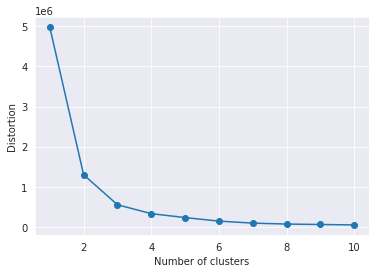

In [522]:
from sklearn.cluster import KMeans
for j in clust:
    distortions = []
    if train[j].dtype == object: # One-Hot encode data if it is categorical
        dummies = pd.get_dummies(train[j], drop_first=True)
        for i in range(1, 11):
            km = KMeans(
                n_clusters=i, init='k-means++',
                n_init=20, max_iter=300,
                tol=1e-04, random_state=0
            )
            km.fit(dummies)
            distortions.append(km.inertia_)

        # plot
        print(j, km.inertia_)
        plt.plot(range(1, 11), distortions, marker='o')
        plt.xlabel('Number of clusters')
        plt.ylabel('Distortion')
        plt.show()
    
    else:
        for i in range(1, 11):
            km = KMeans(
                n_clusters=i, init='k-means++',
                n_init=20, max_iter=300,
                tol=1e-04, random_state=0
            )
            km.fit(pd.DataFrame(train[j]))
            distortions.append(km.inertia_)

        # plot

        print(j, km.inertia_)
        plt.plot(range(1, 11), distortions, marker='o')
        plt.xlabel('Number of clusters')
        plt.ylabel('Distortion')
        plt.show()



#### Six gave the best score on the CV

In [523]:
kmeans = KMeans(
        n_clusters=6, init='k-means++',
        n_init=20, max_iter=300,
        tol=1e-04, random_state=0
    )

In [524]:
test = test_df.copy()

In [525]:
%%capture 
#To avoid clumsy cell output

for col in clust:
    if train[col].dtype == object:
        dummies = pd.get_dummies(train[col], drop_first=True)
        test_dum = pd.get_dummies(test[col], drop_first=True)
        kmeans.fit(dummies)
        train[col+'_grouped'] = kmeans.labels_
        test[col+'_grouped'] = kmeans.predict(test_dum)
    else:
        kmeans.fit(pd.DataFrame(train[col]))
        train[col+'_grouped'] = kmeans.labels_
        test[col+'_grouped'] = kmeans.predict(pd.DataFrame(test[col]))


In [526]:
train.shape, test.shape

((373, 48), (558, 48))

In [527]:
train.head()

,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,price_range,income_range,prod_PURCHASE_INCOME,...,PURCHASED_ATmonth,PURCHASED_ATdayofweek,MERCHANT_CATEGORIZED_ATyear,MERCHANT_CATEGORIZED_ATmonth,MERCHANT_CATEGORIZED_ATdayofweek,MD_PURCHASED_ATMERCHANT_CATEGORIZED_AT,YD_PURCHASED_ATMERCHANT_CATEGORIZED_AT,DD_PURCHASED_ATMERCHANT_CATEGORIZED_AT,count_DD_PURCHASED_ATMERCHANT_CATEGORIZED_AT,MERCHANT_NAME_grouped
0,413,10,1700,3,10000,29,ID_04mk78fa,3,3,0.170000,...,5,2,1,5,2,0,0,0,72,3
1,299,12,100,4,90000,25,ID_04xkfb07,3,0,0.001111,...,10,6,0,10,0,0,0,-1,18,5
2,348,1,20,3,10000,29,ID_051urwuw,3,3,0.002000,...,5,4,1,5,4,0,0,6,18,1
3,434,8,3800,5,252000,3,ID_0e1om7rz,3,0,0.015079,...,2,0,1,4,1,-2,0,-64,4,3
4,244,0,60,3,10000,29,ID_0kfcoawb,3,3,0.006000,...,5,2,1,5,2,0,0,0,72,5


## Correlation

### 1. Negative correlation with the target

In [528]:
train.corr()['MERCHANT_CATEGORIZED_AS'].sort_values()[train.corr()['MERCHANT_CATEGORIZED_AS'].sort_values() < 0]

count_MERCHANT_NAME                            -0.296200
income_sum                                     -0.266409
purchase_merch_count                           -0.264418
USER_ID                                        -0.229815
bins_income_min                                -0.210669
purchase_merch_sum                             -0.200589
count_DD_PURCHASED_ATMERCHANT_CATEGORIZED_AT   -0.199362
purchase_merch_max                             -0.185164
bins_purchase_merch_min                        -0.166804
income_range                                   -0.161370
MERCHANT_CATEGORIZED_ATyear                    -0.103929
PURCHASED_ATyear                               -0.090130
prod_PURCHASE_INCOME                           -0.089648
count_USER_INCOME                              -0.087789
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY_True     -0.086870
PURCHASE_VALUE                                 -0.074565
USER_GENDER_Male                               -0.073213
count_USER_HOUSEHOLD           

### 2. Positive correlation with the Target

In [529]:
train.corr()['MERCHANT_CATEGORIZED_AS'].sort_values()[train.corr()['MERCHANT_CATEGORIZED_AS'].sort_values() >0]

purchase_merch_mean                            0.004269
bins_income_sum                                0.019549
DD_PURCHASED_ATMERCHANT_CATEGORIZED_AT         0.024230
MD_PURCHASED_ATMERCHANT_CATEGORIZED_AT         0.030059
PURCHASED_ATdayofweek                          0.030761
MERCHANT_NAME_bins                             0.039308
USER_INCOME                                    0.041954
YD_PURCHASED_ATMERCHANT_CATEGORIZED_AT         0.045564
purchase_merch_min                             0.054583
MERCHANT_CATEGORIZED_ATmonth                   0.057745
bins_income_mean                               0.059346
price_range                                    0.066434
MERCHANT_NAME                                  0.067395
income_mean                                    0.072313
USER_GENDER_Female                             0.073213
bins_purchase_merch_sum                        0.075089
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY_False    0.086870
bins_income_max                                0

## Save the new datasets

In [530]:
# train_df.to_csv('train_noagegroups.csv',index=False)
# test_df.to_csv('test_noagegroups.csv',index=False)
train.to_csv(path + 'alvintrain_merchantcustomied.csv',index=False)
test.to_csv(path + 'alvintest_merchantcustomized.csv',index=False)